Original digits dataset shape: (1797, 64)
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: use_ntk
True
what: us

Iterations: 100%|██████████| 500/500 [00:00<00:00, 583.95it/s]


t-SNE with NTK execution time: 1.74 seconds
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
Fa

Iterations: 100%|██████████| 500/500 [00:00<00:00, 718.77it/s]


Standard t-SNE execution time: 0.74 seconds


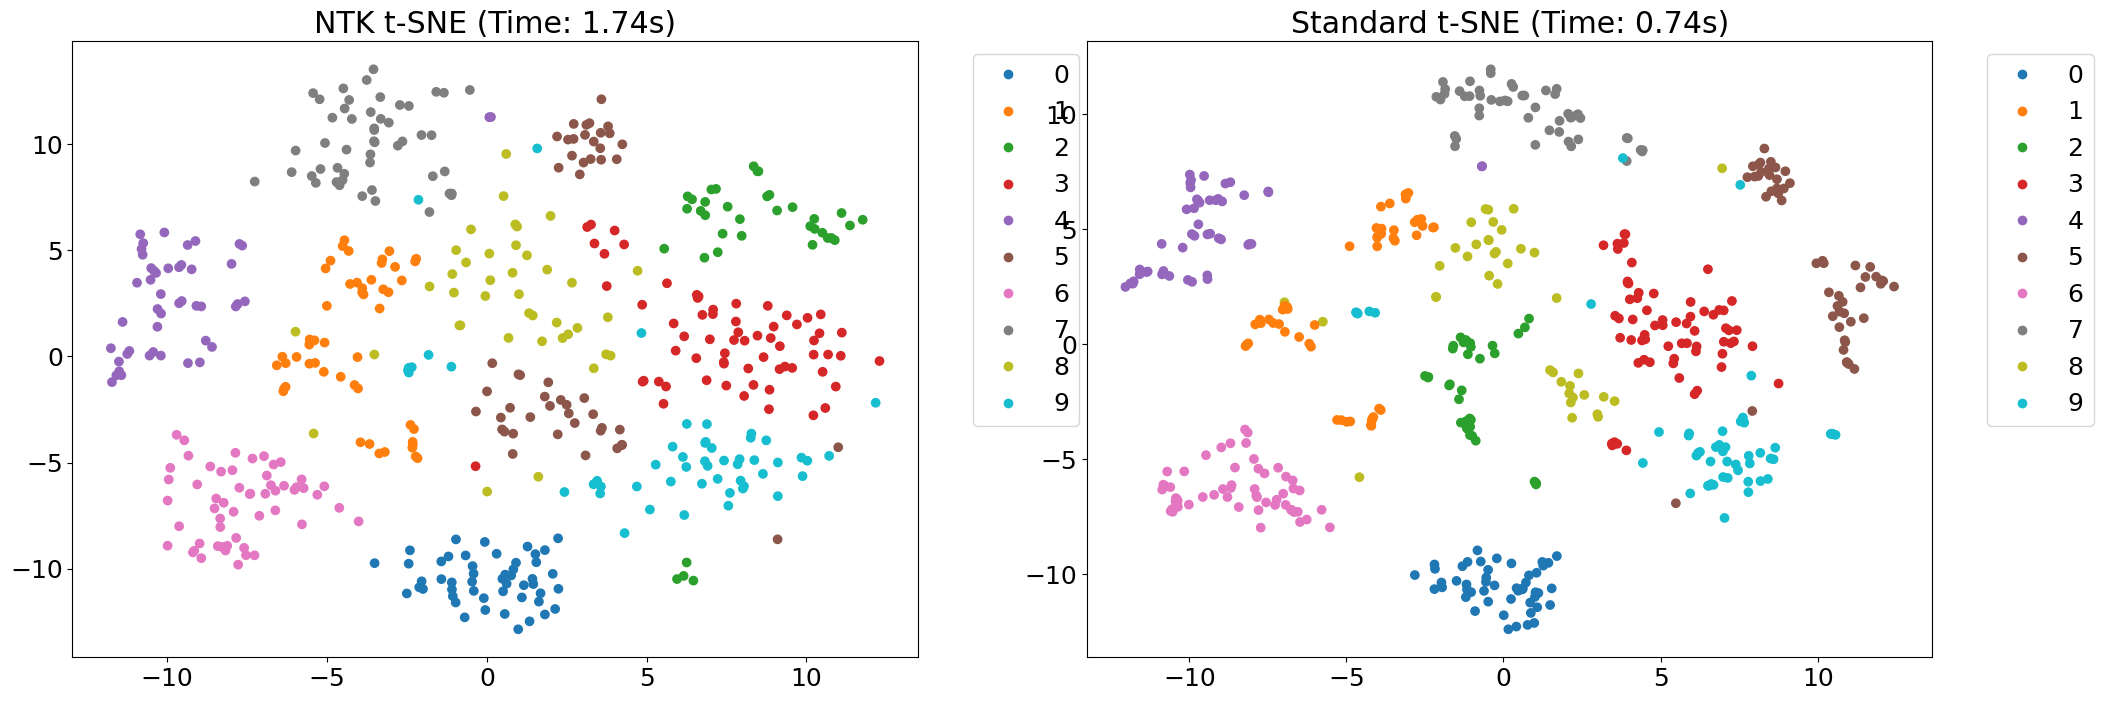

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import load_digits
import numpy as np
import time
import tsnejax

rcParams["font.size"] = 18
rcParams["figure.figsize"] = (24, 8)  # Adjusted for side-by-side plots

# Load digits dataset
digits, digit_class = load_digits(return_X_y=True)
print(f"Original digits dataset shape: {digits.shape}")

# Define the size of the subset for t-SNE
subset_size = 500  # You can change this value as needed

# Select a random subset of the data
rand_idx = np.random.choice(np.arange(digits.shape[0]), size=subset_size, replace=False)
data = digits[rand_idx, :].copy()
classes = digit_class[rand_idx]

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

# First plot with use_ntk = True
start_time = time.time()
low_dim_ntk = tsnejax.compute_low_dimensional_embedding(data, 2, 30, 500, 100, pbar=True, use_ntk=True)
end_time = time.time()
execution_time_ntk = end_time - start_time
print(f"t-SNE with NTK execution time: {execution_time_ntk:.2f} seconds")
scatter_ntk = axes[0].scatter(low_dim_ntk[:, 0], low_dim_ntk[:, 1], cmap="tab10", c=classes)
axes[0].set_title(f'NTK t-SNE (Time: {execution_time_ntk:.2f}s)')
axes[0].legend(*scatter_ntk.legend_elements(), fancybox=True, bbox_to_anchor=(1.05, 1))

# Second plot with use_ntk = False
start_time = time.time()
low_dim_no_ntk = tsnejax.compute_low_dimensional_embedding(data, 2, 30, 500, 100, pbar=True, use_ntk=False)
end_time = time.time()
execution_time_no_ntk = end_time - start_time
print(f"Standard t-SNE execution time: {execution_time_no_ntk:.2f} seconds")
scatter_no_ntk = axes[1].scatter(low_dim_no_ntk[:, 0], low_dim_no_ntk[:, 1], cmap="tab10", c=classes)
axes[1].set_title(f'Standard t-SNE (Time: {execution_time_no_ntk:.2f}s)')
axes[1].legend(*scatter_no_ntk.legend_elements(), fancybox=True, bbox_to_anchor=(1.05, 1))

plt.show()


In [ ]:
import tsnejax
import tsnenumpy
import time
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Define constant synthetic cluster data with more clusters
num_clusters = 5
cluster_size = 100
data = np.vstack([np.random.randn(cluster_size, 2) + i * 2 for i in range(num_clusters)])

# Best perplexity chosen from the previous hyperparameter search
best_perplexity = 30

# Record the start time for the custom t-SNE implementation
start_time_custom = time.time()

# Compute low-dimensional embedding for the best perplexity
Y_custom_jax = tsnejax.compute_low_dimensional_embedding(data, num_dimensions=2, target_perplexity=best_perplexity)

# Calculate the execution time for the custom t-SNE implementation
end_time_custom = time.time()
custom_tsne_time = end_time_custom - start_time_custom

# Record the start time for the custom t-SNE implementation
start_time_custom = time.time()

# Compute low-dimensional embedding for the best perplexity
Y_custom_numpy = tsnenumpy.compute_low_dimensional_embedding(data, num_dimensions=2, target_perplexity=best_perplexity)

# Calculate the execution time for the custom t-SNE implementation
end_time_custom = time.time()
custom_tsne_numpy_time = end_time_custom - start_time_custom


# Record the start time for the scikit-learn t-SNE implementation
start_time_sklearn = time.time()

# Apply t-SNE using scikit-learn for comparison
tsne = TSNE(n_components=2, perplexity=best_perplexity, random_state=0)
Y_sklearn = tsne.fit_transform(data)

# Calculate the execution time for the scikit-learn t-SNE implementation
end_time_sklearn = time.time()
sklearn_tsne_time = end_time_sklearn - start_time_sklearn

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot the original data
axes[0].scatter(data[:, 0], data[:, 1], 20, range(len(data)))
axes[0].set_title('Original Data')
axes[0].grid(True)

# Plot the jax t-SNE results with the best perplexity
axes[1].scatter(Y_custom_numpy[:, 0], Y_custom_numpy[:, 1], 20, range(len(Y_custom_numpy)))
axes[1].set_title(f'Numpy t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[1].grid(True)

# Plot the numpy t-SNE results with the best perplexity
axes[2].scatter(Y_custom_jax[:, 0], Y_custom_jax[:, 1], 20, range(len(Y_custom_jax)))
axes[2].set_title(f'JAX t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[2].grid(True)

# Plot scikit-learn t-SNE results with the same perplexity
axes[3].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], 20, range(len(Y_sklearn)))
axes[3].set_title(f'Scikit-learn t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[3].grid(True)

# Display the subplots
plt.tight_layout()
plt.show()
# Print the execution times
print(f"Custom t-SNE JAX Execution Time: {custom_tsne_time} seconds")
print(f"Custom t-SNE Numpy Execution Time: {custom_tsne_numpy_time} seconds")
print(f"Scikit-learn t-SNE Execution Time: {sklearn_tsne_time} seconds")

